In [1]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/combined_survey_filtered_wout_outliers.xlsx'
df =pd.read_excel(file_path)



In [2]:
# enter the coulmns names as varibels:

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
year='שנת הצעת העבודה'
company='חברה (נא לכתוב באנגלית את שם החברה)'
courses='קורסי מפתח שעשית לפני הצעת העבודה'
exp='האם היה לך ניסיון לפני קבלת המשרה?'
sem='באיזה סמסטר היית כשקיבלת את ההצעה?'

ice_cream='טעם גלידה אהוב'

rounding_density=2

In [3]:
av_df=df[salary].astype(float).sum()/len(df)
av_df
print(f"avrg salary is {av_df}, the len of the df is :{len(df)}")

avrg salary is 94.15186246418338, the len of the df is :349


In [47]:
from scipy.stats import ttest_ind


#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

def create_sorted_average_dict(dict,field):
    average_dict={}
    sorted_dict={}
    #calculate the average:
    for name in dict:
        average_dict[name]=calculate_average(dict[name],field)

    #sort:
    sorted_salary_list=sorted(average_dict.items(), key=lambda x: x[1])

    for tup in sorted_salary_list:
        average_rounded=round(tup[1],rounding_density)
        new_key= tup[0]+" "+str(average_rounded)
        sorted_dict[new_key]=tup[1] 
    return sorted_dict

def create_ttest_for_pairs(dict,list):
    for c_var in list:
        for c_var2 in list:
            # I want to print each pair just once, so print it only if the left bigger than the right one:            
            if c_var < c_var2:
                print(f"ttest values for {str(c_var)} and {str(c_var2)} is f{ttest_ind(dict[c_var], dict[c_var2])}")

In [5]:
#calculate average salary and grades:

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)

print(average_salary_male)
print(average_grade_male)
print(average_salary_female)
print(average_grade_female)

print('num of mens:' +str(len(male_df)))
print('num of females:' +str(len(female_df)))

res = ttest_ind(male_df[salary], female_df[salary])

print(res)


95.03625954198473
84.42404580152672
92.46296296296296
83.09876543209876
num of mens:262
num of females:81
Ttest_indResult(statistic=1.0880802954064281, pvalue=0.2773280911762262)


In [6]:
#bargin presentage:

precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')

bargin_m=male_df[male_df[bargin]=='כן']
n_bargin_m=male_df[male_df[bargin]=='לא']
bargin_f=female_df[female_df[bargin]=='כן']
n_bargin_f=female_df[female_df[bargin]=='לא']


print("bargin man avreage salary: "+str(calculate_average( bargin_m,salary))+ '   Amount:'+str(len(bargin_m)))
print("didn't bargin man avreage salary: "+str(calculate_average( n_bargin_m,salary))+ '   Amount:'+str(len(n_bargin_m)))
print("bargin woman avreage salary: "+str(calculate_average( bargin_f,salary))+ '   Amount:'+str(len(bargin_f)))
print("didn't bargin woman avreage salary: "+ str(calculate_average( n_bargin_f,salary))+ '   Amount:'+str(len(n_bargin_f)))


bargin man avreage salary: 94.12264150943396   Amount:53
didn't bargin man avreage salary: 95.61463414634146   Amount:205
bargin woman avreage salary: 85.71923076923076   Amount:26
didn't bargin woman avreage salary: 95.39245283018869   Amount:53


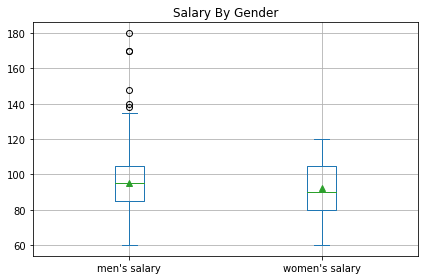

In [7]:
import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"men\'s salary": male_df[salary].astype(float), "women\'s salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['men\'s salary', 'women\'s salary']].plot(kind='box',grid=True, showmeans=True,title='Salary By Gender')

# Display the plot
plt.show()

In [8]:
#get outliers cleaned for the scatter point:
scatter_df=df
scatter_df[scatter_df[salary]>160]
scatter_df = scatter_df.drop(scatter_df[scatter_df[salary]>160].index)

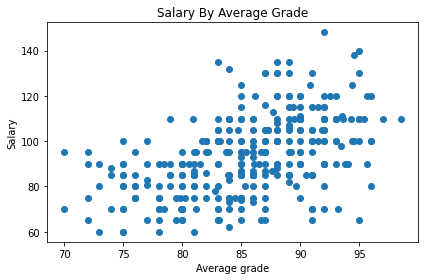

In [9]:
#prepare the scatter points:
x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)
plt.scatter(x,y)
plt.title("Salary By Average Grade")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()

In [10]:
#from scipy.stats import pearsonr
#
#pearsonr(scatter_df[grade].astype(float), scatter_df[salary].astype(float))

In [11]:
#calculate num of exmples from each company:
temp_df=df
num_of_examples={}
companies_names=['Intel','Microsoft','Amazon','Google','Facebook','Apple','IBM','Rafael','Elbit','Plus500','Nvidia','Mobileye']
for company_name in companies_names:
        num_of_examples[company_name]=len(temp_df[temp_df[company]==company_name])
print(num_of_examples)


{'Intel': 81, 'Microsoft': 20, 'Amazon': 22, 'Google': 2, 'Facebook': 4, 'Apple': 12, 'IBM': 11, 'Rafael': 40, 'Elbit': 15, 'Plus500': 2, 'Nvidia': 13, 'Mobileye': 9}


In [12]:
#get the calculate companies average:

from cmath import nan


companies_dict={}
companies_names=['Intel','Microsoft','Amazon','Apple','IBM','Rafael','Elbit','Nvidia','Mobileye']

for company_name in companies_names:
    companies_dict[company_name]=df[df[company]==company_name]

In [13]:

sorted_salaries_companies=create_sorted_average_dict(companies_dict,salary)


In [14]:
# bar plot - not neeeded:

#fig=plt.figure(figsize=(15,5))
#plt.bar(sorted_salaries_companies.keys(), sorted_salaries_companies.values(), color ='maroon',
#        width = 0.4)
# 
#plt.xlabel("Companies")
#plt.ylabel("Average Salary")
#plt.title("Companies average Salaries")
#plt.show()


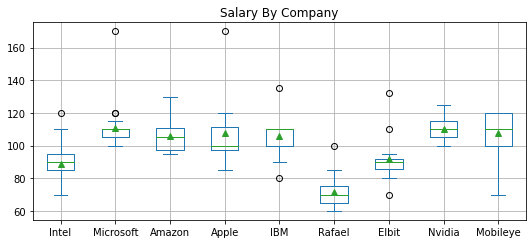

In [15]:
# box plot by company:

import matplotlib.pyplot as plt

for current_company in companies_dict:
    current_df=companies_dict[current_company]
    companies_dict[current_company]=(current_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(companies_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,showmeans=True,title='Salary By Company')

# Display the plot
plt.show()

In [16]:
ice_cream_df_dict={}
ice_ceam_names=['בייגלה מלוח - קרמל','פיסטוק','וניל עוגיות','בצק עוגיות','שוקולד בראוניס']

for ice_cream_name in ice_ceam_names:
    ice_cream_df_dict[ice_cream_name]=df[df[ice_cream]==ice_cream_name]    

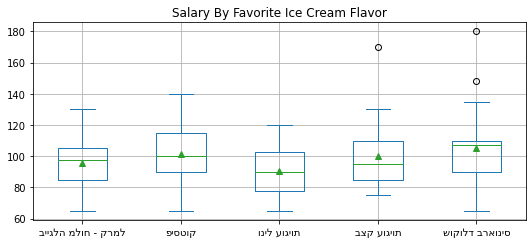

In [17]:
import matplotlib.pyplot as plt


for flavor in ice_cream_df_dict:
    c_df=ice_cream_df_dict[flavor]
    ice_cream_df_dict[flavor]=(c_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(ice_cream_df_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Favorite Ice Cream Flavor')

# Display the plot
plt.show()

In [18]:
#sorted_salaries_companies=create_sorted_average_dict(ice_cream_df_dict,salary)


In [19]:
print(sorted_salaries_companies)

{'Rafael 71.28': 71.275, 'Intel 88.76': 88.76172839506172, 'Elbit 91.47': 91.46666666666667, 'IBM 105.91': 105.9090909090909, 'Amazon 106.0': 106.0, 'Apple 107.5': 107.5, 'Mobileye 107.78': 107.77777777777777, 'Nvidia 110.0': 110.0, 'Microsoft 111.0': 111.0}


In [20]:
mtm='מת"מ'
mivni='מבני נתונים'
operation_s='הפעלה'
algo='אלגו'

df_by_courses={}
courses_names=[mtm,mivni,operation_s,algo]

for course in courses_names:
    df_by_courses[course] = df.loc[df[courses].str.contains(course,na=False)]

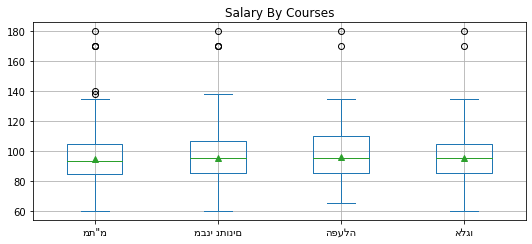

In [21]:
courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)

courses_dict={}

for course in courses_names:
    courses_dict[course]=(df.loc[df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses')

# Display the plot
plt.show()

In [22]:
courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)
print(courses_average_dict)


{'מת"מ 94.75': 94.74698795180723, 'אלגו 95.48': 95.47897727272726, 'מבני נתונים 95.5': 95.49668874172185, 'הפעלה 96.0': 96.00176470588235}


In [23]:
#no_exp='ללא ניסיון כלל'
#no_exp_df=df[df[exp]==no_exp]
#
#no_exp_courses_dict={}
#
#for key in df_by_courses:
#    current_course_df=df_by_courses[key]
#    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]
#
#
#courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
#print(courses_noexp_average_dict)
#
#for course in courses_names:
#    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)
#
## Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#
## Pandas dataframe
##combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
#combined_dfs=pd.DataFrame(courses_dict)
## Plot the dataframe
#ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people without experience)')
#
## Display the plot
#plt.show()

{'מת"מ 93.96': 93.95977443609023, 'מבני נתונים 94.82': 94.81902834008096, 'אלגו 95.57': 95.57152777777777, 'הפעלה 95.99': 95.98768115942029}


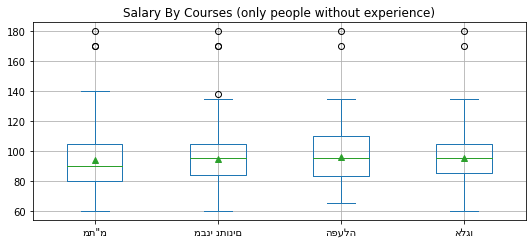

In [24]:
no_exp='ללא ניסיון כלל'
no_exp_df=df[df[exp]==no_exp]

no_exp_courses_dict={}

for key in df_by_courses:
    current_course_df=df_by_courses[key]
    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]


courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
print(courses_noexp_average_dict)

for course in courses_names:
    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people without experience)')

# Display the plot
plt.show()

In [25]:
def checkBySemster(semester_num):
    #sem5 no exp
    semster=semester_num
    sem_df=no_exp_df[no_exp_df[sem]==semster]

    sem5_courses_dict={}

    for key in df_by_courses:
        current_course_df=df_by_courses[key]
        sem5_courses_dict[key] = current_course_df[current_course_df[exp]==semster]


    sem_average_dict = create_sorted_average_dict(dict=sem5_courses_dict,field= salary)
    print(sem_average_dict)

    for course in courses_names:
        courses_dict[course]=(sem_df.loc[sem_df[courses].str.contains(course,na=False)][salary]).astype(float)

    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # Pandas dataframe
    #combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
    combined_dfs=pd.DataFrame(courses_dict)
    # Plot the dataframe
    ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people from semster '+str(semester_num)+' )')

    # Display the plot
    plt.show()

{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


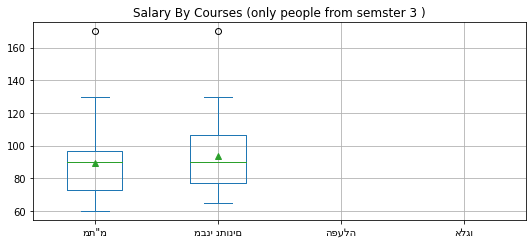

In [26]:
#sem5 no exp
checkBySemster(3)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


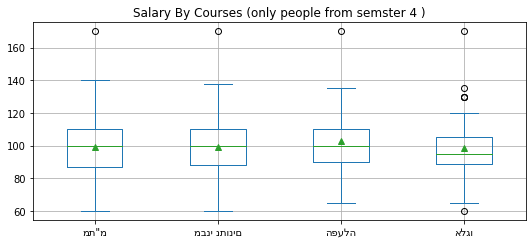

In [27]:
checkBySemster(4)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


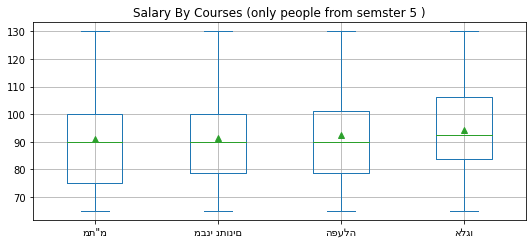

In [28]:
checkBySemster(5)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


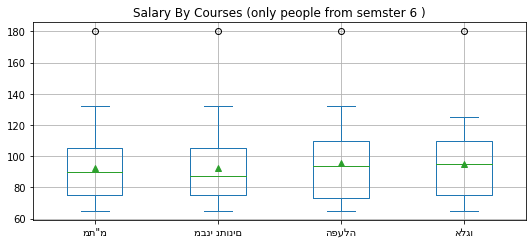

In [29]:
checkBySemster(6)

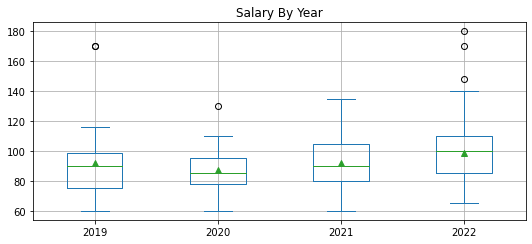

In [30]:
dict_df_years={}
years=[2019,2020,2021,2022]

for c_year in years:
        dict_df_years[c_year]=(df[df[year]==c_year][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(dict_df_years)
# Plot the dataframe
ax = combined_dfs.plot(kind='box', showmeans=True,grid=True,title='Salary By Year')

# Display the plot
plt.show()

In [46]:
for c_year in years:
    print(f"len of {c_year} is {len(dict_df_years[c_year])} and mean is {dict_df_years[c_year].mean()}")

len of 2019 is 26 and mean is 91.95384615384616
len of 2020 is 49 and mean is 87.13673469387754
len of 2021 is 105 and mean is 91.72380952380952
len of 2022 is 167 and mean is 98.54790419161677


In [49]:
create_ttest_for_pairs(dict_df_years,years)

ttest values for 2019 and 2020 is fTtest_indResult(statistic=1.0120426873694528, pvalue=0.31486038142974354)
ttest values for 2019 and 2021 is fTtest_indResult(statistic=0.05463576456054496, pvalue=0.9565131707939825)
ttest values for 2019 and 2022 is fTtest_indResult(statistic=-1.5411941391852693, pvalue=0.1249246572471263)
ttest values for 2020 and 2021 is fTtest_indResult(statistic=-1.616972730639913, pvalue=0.10795764815582604)
ttest values for 2020 and 2022 is fTtest_indResult(statistic=-3.832557868245613, pvalue=0.0001667127262516421)
ttest values for 2021 and 2022 is fTtest_indResult(statistic=-2.9774278323806014, pvalue=0.0031706785629390705)


In [45]:
#General info for the doc:

print(f"The average salary in 2022 is {dict_df_years[2022].mean()}, and N of 2022 is : {len(dict_df_years[2022])}")
df22=df[df[year]==2022]
df2022_n_prior_exp=df22[df22[exp]==no_exp]
print(f"The average salary in 2022 without prior exp is {df2022_n_prior_exp[salary].mean()}, and N of 2022 is : {len(df2022_n_prior_exp)}")

The average salary in 2022 is 98.54790419161677, and N of 2022 is : 167
The average salary in 2022 without prior exp is 98.63953488372093, and N of 2022 is : 129


,Timestamp,מסלול לימודים,באיזה סמסטר היית כשקיבלת את ההצעה?,ממוצע (נכון לתקופת חיפוש העבודה),האם ביקשו גיליון ציונים?,קורסי מפתח שעשית לפני הצעת העבודה,האם היה לך ניסיון לפני קבלת המשרה?,"שכר שעתי במשרת הסטודנט הראשונה (ש""ח לשעה)",האם התמקחת אחרי קבלת ההצעה?,חברה (נא לכתוב באנגלית את שם החברה),תחום המשרה,מין,טעם גלידה אהוב,שנת הצעת העבודה
2,2022-08-16 16:52:11.865,"מדמ""ח",3.0,72.0,כן,"מת""מ, מבני נתונים",ללא ניסיון כלל,65.0,לא,Rafael,Software Development,זכר,בייגלה מלוח - קרמל,2022.0
9,2022-08-16 13:46:51.099,"מדמ""ח",6.0,74.0,לא,"מת""מ, מבני נתונים, הפעלה, אלגו",ללא ניסיון כלל,70.0,כן,Devlion,Software Development,זכר,פיסטוק,2022.0
11,2022-08-16 13:56:27.861,"מדמ""ח",4.0,74.0,כן,"מת""מ, מבני נתונים",ללא ניסיון כלל,88.0,כן,Elbit,Software Development,זכר,וניל עוגיות,2022.0
14,2022-08-16 12:41:55.154,הנדסת מחשבים,6.0,75.0,לא,"מת""מ, מבני נתונים, הפעלה, אלגו, קורס בחירה הקש...",ללא ניסיון כלל,70.0,לא,NaN,Backend,NaN,פיסטוק,2022.0
18,2022-08-17 00:46:01.247,הנדסת מחשבים,6.0,75.0,כן,"מת""מ, מבני נתונים, הפעלה, אלגו",ללא ניסיון כלל,85.0,לא,Intel,Software Development,זכר,בייגלה מלוח - קרמל,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2022-08-16 23:47:38.101,"מדמ""ח",4.0,95.0,כן,"מת""מ",ללא ניסיון כלל,140.0,לא,Small Start Up,Software Development,זכר,פיסטוק,2022.0
336,2022-08-16 17:28:55.389,"מדמ""ח - מתמטיקה",4.0,96.0,כן,"מבני נתונים, אלגו",ללא ניסיון כלל,100.0,לא,StarkWare,Software Development,זכר,פיסטוק,2022.0
340,2022-08-17 00:54:42.117,"מדמ""ח",3.0,98.5,כן,"מת""מ",ללא ניסיון כלל,110.0,לא,NaN,NaN,זכר,בייגלה מלוח - קרמל,2022.0
344,2022-08-16 14:05:53.886,"מדמ""ח",6.0,NaN,כן,"מת""מ, מבני נתונים, הפעלה, אלגו",ללא ניסיון כלל,95.0,לא,NaN,Software Development,זכר,בייגלה מלוח - קרמל,2022.0
